In [1]:

from my_functions import *
import os
import shutil

# path to the source image file
import pytesseract
# import PIL as pillow
from PIL import Image


source = 'sess.mp4' 

save_video = True # want to save video? (when video as source)
show_video=True # set true when using video file
save_img=True  # set true when using only image file to save the image
# when using image as input, lower the threshold value of image classification

#saving video as output
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, frame_size)

cap = cv2.VideoCapture(source)
while(cap.isOpened()):
	ret, frame = cap.read()
	if ret == True:
		frame = cv2.resize(frame, frame_size)  # resizing image
		orifinal_frame = frame.copy()
		frame, results = object_detection(frame) 

		rider_list = []
		head_list = []
		number_list = []

		for result in results:
			x1,y1,x2,y2,cnf, clas = result
			if clas == 0:
				rider_list.append(result)
			elif clas == 1:
				head_list.append(result)
			elif clas == 2:
				number_list.append(result)

		for rdr in rider_list:
			time_stamp = str(time.time())
			x1r, y1r, x2r, y2r, cnfr, clasr = rdr
			for hd in head_list:
				x1h, y1h, x2h, y2h, cnfh, clash = hd
				if inside_box([x1r,y1r,x2r,y2r], [x1h,y1h,x2h,y2h]): # if this head inside this rider bbox
					try:
						head_img = orifinal_frame[y1h:y2h, x1h:x2h]
						helmet_present = img_classify(head_img)
					except:
						helmet_present[0] = None

					if  helmet_present[0] == True: # if helmet present
						frame = cv2.rectangle(frame, (x1h, y1h), (x2h, y2h), (0,255,0), 1)
						frame = cv2.putText(frame, f'{round(helmet_present[1],1)}', (x1h, y1h+40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
					elif helmet_present[0] == None: # Poor prediction
						frame = cv2.rectangle(frame, (x1h, y1h), (x2h, y2h), (0, 255, 255), 1)
						frame = cv2.putText(frame, f'{round(helmet_present[1],1)}', (x1h, y1h), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
					elif helmet_present[0] == False: # if helmet absent 
						frame = cv2.rectangle(frame, (x1h, y1h), (x2h, y2h), (0, 0, 255), 1)
						frame = cv2.putText(frame, f'{round(helmet_present[1],1)}', (x1h, y1h+40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
						try:
							cv2.imwrite(f'riders_pictures/{time_stamp}.jpg', frame[y1r:y2r, x1r:x2r])
						except:
							print('could not save rider')

						for num in number_list:
							x1_num, y1_num, x2_num, y2_num, conf_num, clas_num = num
							if inside_box([x1r,y1r,x2r,y2r], [x1_num, y1_num, x2_num, y2_num]):
								try:
									
									num_img = orifinal_frame[y1_num:y2_num, x1_num:x2_num]
									a=time_stamp
									b=conf_num
									cv2.imwrite(f'number_plates/{a}_{b}.jpg', num_img)
									# load the image file
									img = Image.open(f'number_plates/{a}_{b}.jpg')

									# perform OCR using pytesseract
									text = pytesseract.image_to_string(img)

									# print the extracted text
									print(text)

								except:
									print('could not save number plate')
		
		if save_video: # save video
			out.write(frame)
		if save_img: #save img
			cv2.imwrite('saved_frame.jpg', frame)
		src_file = 'saved_frame.jpg'

		# path to the destination folder
		dst_folder = 'riders_pictures'

		# construct the destination file path
		dst_file = os.path.join(dst_folder, os.path.basename(src_file))

		# copy the source image file to the destination folder
		shutil.copy(src_file, dst_file)

		if show_video: # show video
			frame = cv2.resize(frame, (900, 450))  # resizing to fit in screen
			cv2.imshow('Frame', frame)


		if cv2.waitKey(1) & 0xFF == ord('q'):
			break
			
	else:
		break

cap.release()
cv2.destroyAllWindows()
print('Execution completed')

KeyboardInterrupt: 

Text(0.5, 1.0, 'license plate')

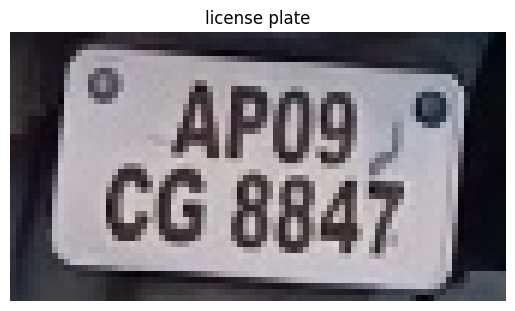

In [15]:
import cv2
from matplotlib import pyplot as plt
import pytesseract
import os 
from PIL import Image

path1 = "C:/Users/sanja/Downloads/motorcycle_license_plate/number_plates"    

# listing = os.listdir(path1)    
# for file in listing:
#     im = Image.open(path1 + file)   
#     im.resize((50,50))   
#     # Load the image and convert it to grayscale
test_license_plate = cv2.imread(r"C:\Users\sanja\Downloads\x.jpg")
plt.imshow(test_license_plate)
plt.axis('off')
plt.title('license plate')

Text(0.5, 1.0, 'license plate')

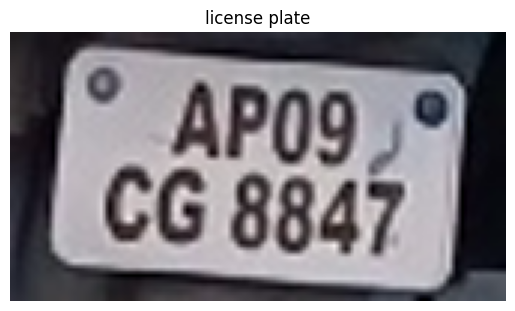

In [16]:
resize_test_license_plate = cv2.resize(
	test_license_plate, None, fx = 2, fy = 2,
	interpolation = cv2.INTER_CUBIC)
plt.imshow(resize_test_license_plate)
plt.axis('off')
plt.title('license plate')


In [45]:
import cv2
import glob

# Specify the directory containing the images
directory = "C:/Users/sanja/Downloads/motorcycle_license_plate/number_plates"
# Use glob to get a list of all image files in the directory
image_files = glob.glob(directory + '/*.jpg')  # Change the extension to match your image format

# Iterate over the image files
for image_path in image_files:
    # Read the image using imread from OpenCV
    img = cv2.imread(image_path)

    plt.imshow(img)
    plt.axis('off')
    plt.title('license plate')

    # Example: Display the image
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Text(0.5, 1.0, 'license plate')

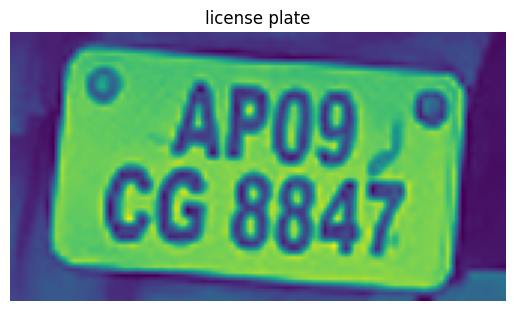

In [17]:
grayscale_resize_test_license_plate = cv2.cvtColor(
    resize_test_license_plate, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_resize_test_license_plate)
plt.axis('off')
plt.title('license plate')


Text(0.5, 1.0, 'license plate')

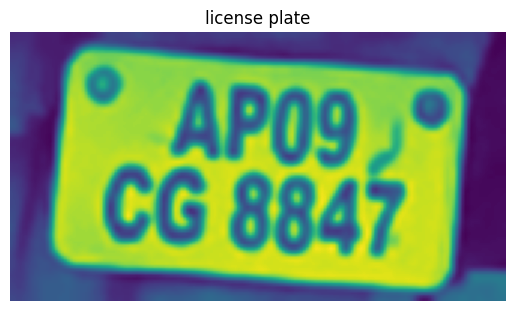

In [18]:
gaussian_blur_license_plate = cv2.GaussianBlur(
    grayscale_resize_test_license_plate, (5, 5), 0)
plt.imshow(gaussian_blur_license_plate)
plt.axis('off')
plt.title('license plate')


In [21]:

text = pytesseract.image_to_string(gaussian_blur_license_plate)#config = '-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 8')
# filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(text)


* AP09.°
CG 8847

<class 'str'>
